In [2]:
import os
import soundfile as sf
import numpy as np

base_dir = "C:/Users/simor/Documents/ICA_Project/data\DEMAND/NPARK_16k"  # adjust path if needed

# list WAV files in folder
files = sorted([f for f in os.listdir(base_dir) if f.lower().endswith(".wav")])
print("Found files:", files)

# load all channels
signals = []
sr = None

for fname in files:
    path = os.path.join(base_dir, fname)
    x, sr_local = sf.read(path)  # x: (T,), sr_local: sampling rate

    if sr is None:
        sr = sr_local
    elif sr != sr_local:
        print("Sampling rate mismatch!", fname, sr_local)

    signals.append(x)

signals = np.stack(signals, axis=0)  # shape: (channels, T)

print("Array shape:", signals.shape)
print("Sample rate:", sr)


Found files: ['ch01.wav', 'ch02.wav', 'ch03.wav', 'ch04.wav', 'ch05.wav', 'ch06.wav', 'ch07.wav', 'ch08.wav', 'ch09.wav', 'ch10.wav', 'ch11.wav', 'ch12.wav', 'ch13.wav', 'ch14.wav', 'ch15.wav', 'ch16.wav']
Array shape: (16, 4800064)
Sample rate: 16000


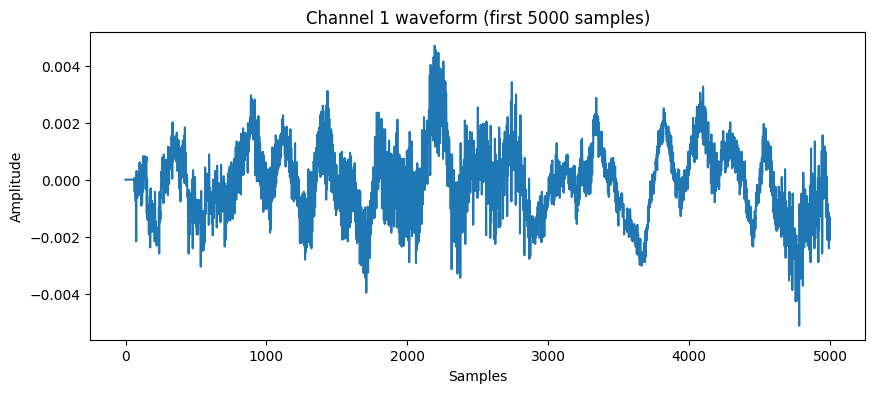

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(signals[0][:5000])  # first 5000 samples of channel 1
plt.title("Channel 1 waveform (first 5000 samples)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
